In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as  go
import matplotlib.colors as mcolors


In [55]:
data = pd.read_csv("Financial Analytics data.csv")

In [56]:
data.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [57]:
data.shape

(488, 5)

In [58]:
data.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [60]:
data.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

In [81]:
data_cleaned = data.drop(columns=['Unnamed: 4', 'S.No.'])
data_cleaned = data_cleaned.dropna()

In [82]:
data_cleaned.head()

,Name,Mar Cap - Crore,Sales Qtr - Crore
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,H D F C,289497.37,16840.51


In [83]:
data_cleaned.isnull().sum()

Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

In [84]:
data_cleaned.shape

(365, 3)

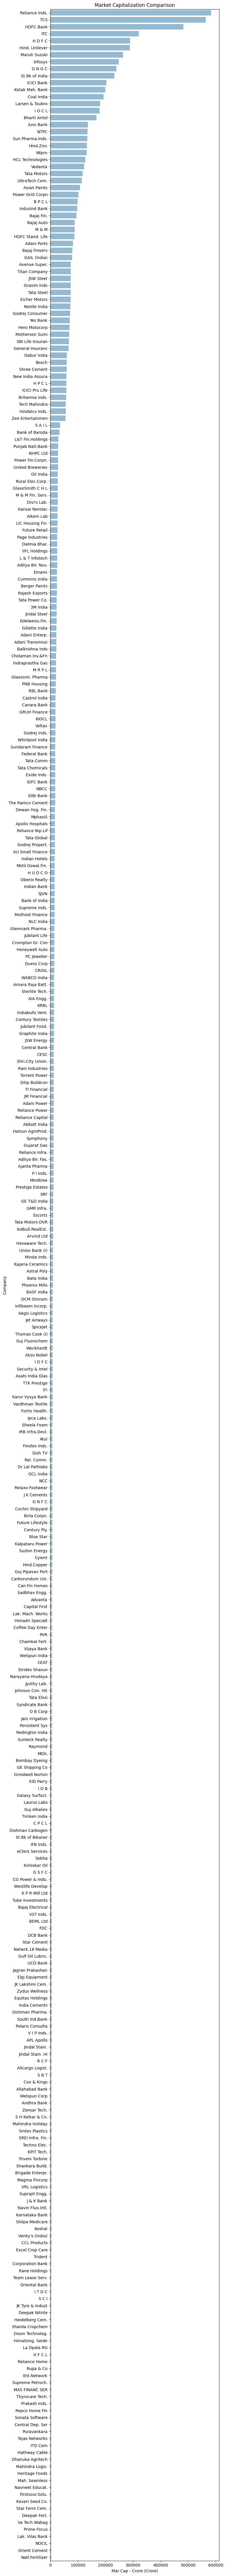

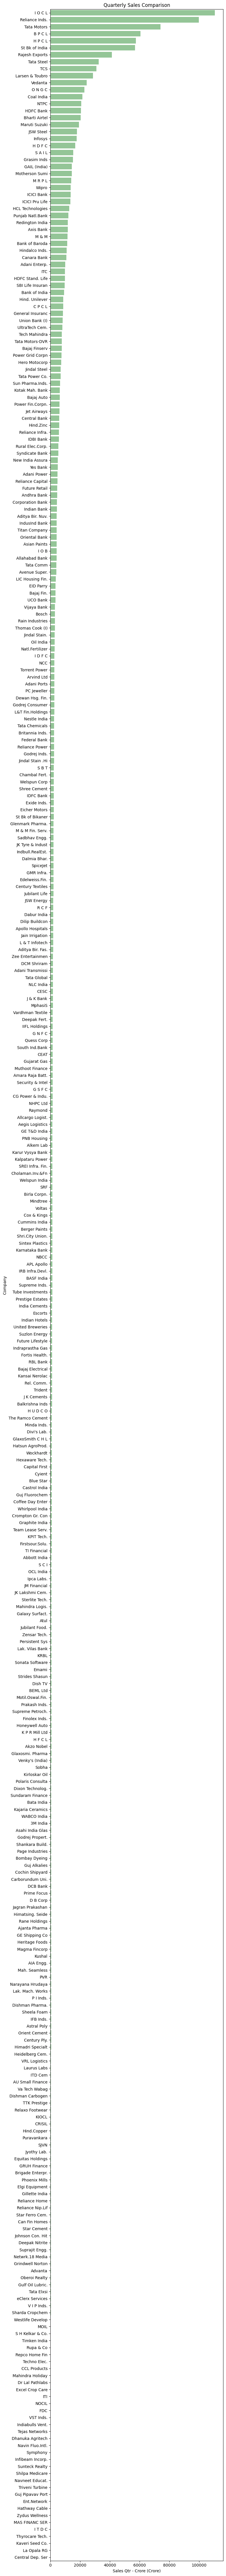

In [85]:
def create_bar_chart(data, x_column, y_column, title, palette):
    plt.figure(figsize=(8, 90))  # Smaller figure size
    sns.set_palette(palette)
    data_sorted = data.sort_values(by=x_column, ascending=False)
    sns.barplot(x=x_column, y=y_column, data=data_sorted)
    plt.xlabel(f'{x_column} (Crore)')
    plt.ylabel('Company')
    plt.title(title)
    plt.xticks()  # Rotate x-axis labels
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

create_bar_chart(data_cleaned, 'Mar Cap - Crore', 'Name', 'Market Capitalization Comparison', 'Blues_d')
create_bar_chart(data_cleaned, 'Sales Qtr - Crore', 'Name', 'Quarterly Sales Comparison', 'Greens_d')

Correlation between Market Cap and Sales:
                   Mar Cap - Crore  Sales Qtr - Crore
Mar Cap - Crore           1.000000           0.620702
Sales Qtr - Crore         0.620702           1.000000


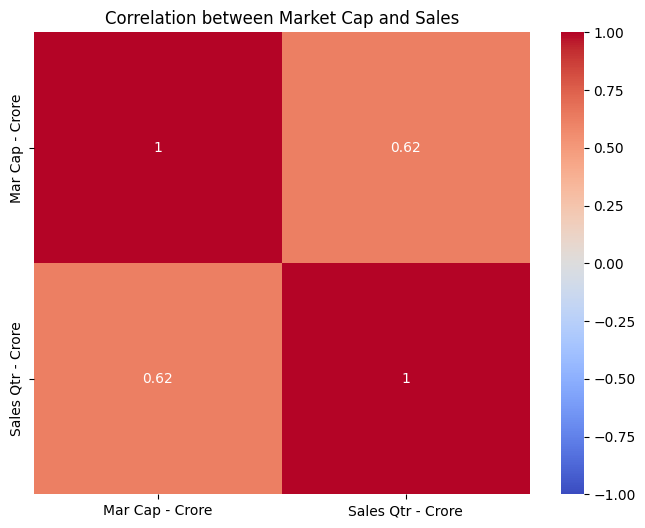

In [86]:
correlation = data_cleaned[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()
print("Correlation between Market Cap and Sales:")
print(correlation)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Market Cap and Sales')
plt.show()

In [87]:
sorted_data = data_cleaned.sort_values(by='Mar Cap - Crore', ascending=False)
top_five_companies = sorted_data.head(5)
print("Top five companies by Market Cap:")
print(top_five_companies)

Top five companies by Market Cap:
             Name  Mar Cap - Crore  Sales Qtr - Crore
0  Reliance Inds.        583436.72           99810.00
1             TCS        563709.84           30904.00
2       HDFC Bank        482953.59           20581.27
3             ITC        320985.27            9772.02
4         H D F C        289497.37           16840.51


In [88]:
sorted_data_ascending = data_cleaned.sort_values(by='Mar Cap - Crore', ascending=True).reset_index()
bottom_five_companies = sorted_data_ascending.head(5)
print("Bottom five companies by Market Cap:")
print(bottom_five_companies)

Bottom five companies by Market Cap:
   index             Name  Mar Cap - Crore  Sales Qtr - Crore
0    486  Natl.Fertilizer          3017.07            2840.75
1    485    Orient Cement          3024.32             511.53
2    484            NOCIL          3026.26             249.27
3    483  Lak. Vilas Bank          3029.57             790.17
4    482      Prime Focus          3031.50             609.61


In [89]:
sorted_data = data_cleaned.sort_values(by='Sales Qtr - Crore', ascending=False).reset_index()
top_five_companies = sorted_data.head(5)
print("Top five companies by Sales for the Quarter:")
print(top_five_companies)

Top five companies by Sales for the Quarter:
   index            Name  Mar Cap - Crore  Sales Qtr - Crore
0     14         I O C L        178017.48          110666.93
1      0  Reliance Inds.        583436.72           99810.00
2     23     Tata Motors        117071.87           74156.07
3     27         B P C L         98278.00           60616.36
4     54         H P C L         58034.78           57474.25


In [90]:
sorted_sales_ascending = data_cleaned.sort_values(by='Sales Qtr - Crore', ascending=True).reset_index()
bottom_five_sales_companies = sorted_sales_ascending.head(5)
print("Bottom five companies by Sales for the Quarter:")
print(bottom_five_sales_companies)

Bottom five companies by Sales for the Quarter:
   index              Name  Mar Cap - Crore  Sales Qtr - Crore
0    467  Central Dep. Ser          3316.31              47.24
1    455       La Opala RG          3510.93              69.77
2    478   Kaveri Seed Co.          3125.83              70.64
3    463   Thyrocare Tech.          3374.38              77.84
4    445           I T D C          3619.04             102.14


In [91]:
company_stats = data_cleaned.groupby('Name')[['Mar Cap - Crore']].describe()
print(company_stats)

                 Mar Cap - Crore                                              \
                           count      mean std       min       25%       50%   
Name                                                                           
3M India                     1.0  23101.19 NaN  23101.19  23101.19  23101.19   
AIA Engg.                    1.0  13593.35 NaN  13593.35  13593.35  13593.35   
APL Apollo                   1.0   4775.03 NaN   4775.03   4775.03   4775.03   
AU Small Finance             1.0  16453.67 NaN  16453.67  16453.67  16453.67   
Abbott India                 1.0  11924.12 NaN  11924.12  11924.12  11924.12   
...                          ...       ...  ..       ...       ...       ...   
Yes Bank                     1.0  71028.13 NaN  71028.13  71028.13  71028.13   
Zee Entertainmen             1.0  54817.89 NaN  54817.89  54817.89  54817.89   
Zensar Tech.                 1.0   4066.42 NaN   4066.42   4066.42   4066.42   
Zydus Wellness               1.0   4921.

In [92]:
company_stats = data_cleaned.groupby('Name')[['Sales Qtr - Crore']].describe()
print(company_stats)

                 Sales Qtr - Crore                                          \
                             count     mean std      min      25%      50%   
Name                                                                         
3M India                       1.0   645.77 NaN   645.77   645.77   645.77   
AIA Engg.                      1.0   572.16 NaN   572.16   572.16   572.16   
APL Apollo                     1.0  1314.38 NaN  1314.38  1314.38  1314.38   
AU Small Finance               1.0   464.17 NaN   464.17   464.17   464.17   
Abbott India                   1.0   881.49 NaN   881.49   881.49   881.49   
...                            ...      ...  ..      ...      ...      ...   
Yes Bank                       1.0  5070.30 NaN  5070.30  5070.30  5070.30   
Zee Entertainmen               1.0  1838.07 NaN  1838.07  1838.07  1838.07   
Zensar Tech.                   1.0   793.76 NaN   793.76   793.76   793.76   
Zydus Wellness                 1.0   132.40 NaN   132.40   132.4

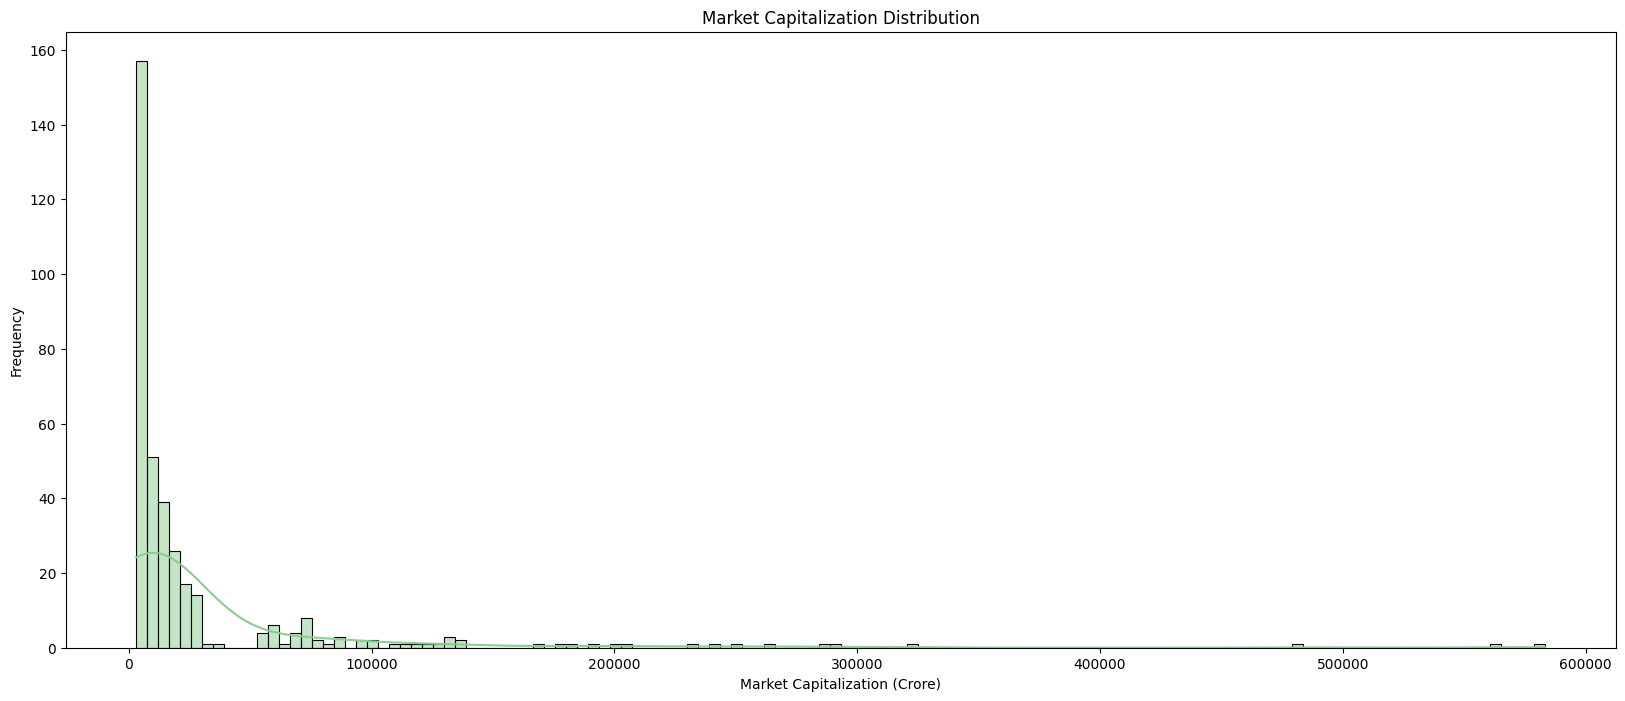

In [93]:
plt.figure(figsize=(20, 8))
sns.histplot(data_cleaned['Mar Cap - Crore'], kde=True)
plt.title('Market Capitalization Distribution')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Frequency')
plt.show()

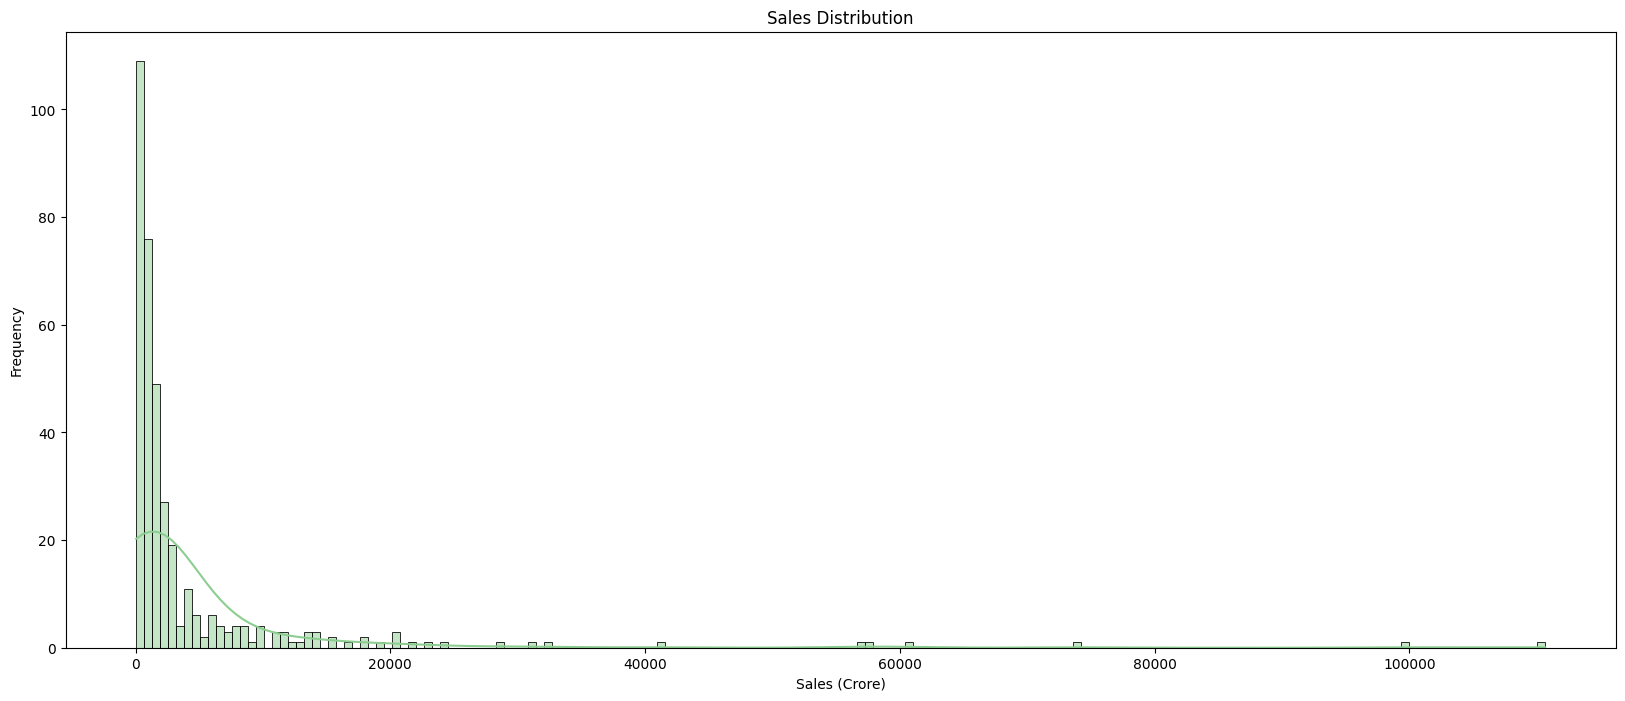

In [94]:
plt.figure(figsize=(20, 8))
sns.histplot(data_cleaned['Sales Qtr - Crore'], kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales (Crore)')
plt.ylabel('Frequency')
plt.show()